In [12]:
!pip install scikit-learn==0.24.2
!pip install imbalanced-learn==0.8.0
!pip install pandas numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 38.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [37]:
!pip install autogluon

In [14]:
!pip install imblearn

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import time
import joblib


from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, classification_report, roc_auc_score, make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
from autogluon.tabular import TabularPredictor

In [22]:
prad_directory = '/content/drive/MyDrive/UOC/2/TFM/código/models/PRAD-lr_clf-ST'
brca_directory = '/content/drive/MyDrive/UOC/2/TFM/código/models/BRCA-lr_clf-ST'

In [42]:
data_BRCA = pd.read_csv('/content/drive/My Drive/UOC/2/TFM/código/data/BRCA-normalized_genes.csv')
data_PRAD = pd.read_csv('/content/drive/My Drive/UOC/2/TFM/código/data/PRAD-normalized_genes.csv')

In [43]:
data_PRAD_X = data_PRAD.iloc[:, 1:]
data_PRAD_y = data_PRAD.iloc[:, 0]
data_BRCA_X = data_BRCA.iloc[:, 1:]
data_BRCA_y = data_BRCA.iloc[:, 0]

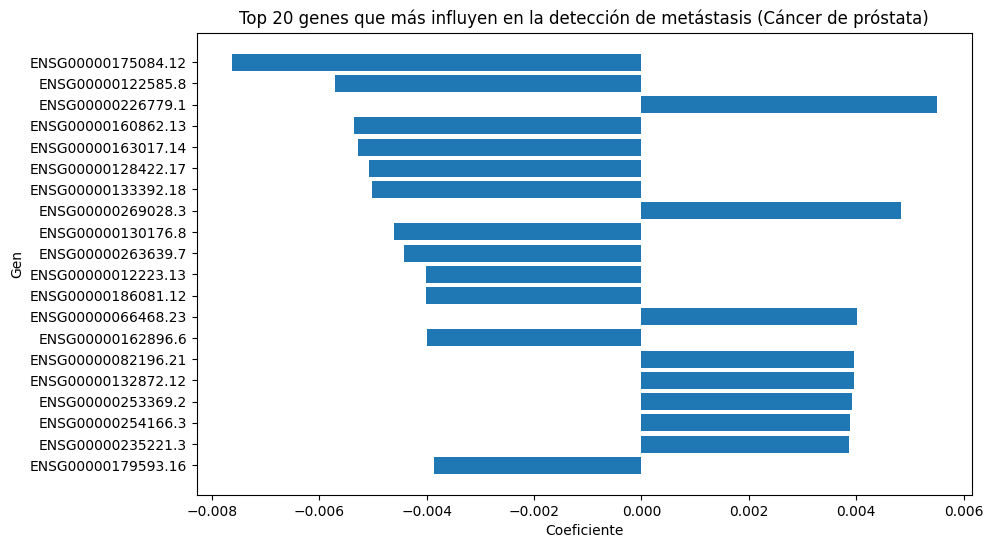

                     gene  coefficient  abs_coefficient
13587  ENSG00000175084.12    -0.007625         0.007625
8265    ENSG00000122585.8    -0.005698         0.005698
26249   ENSG00000226779.1     0.005496         0.005496
2119   ENSG00000160862.13    -0.005357         0.005357
29539  ENSG00000163017.14    -0.005276         0.005276
23542  ENSG00000128422.17    -0.005069         0.005069
30826  ENSG00000133392.18    -0.005025         0.005025
34827   ENSG00000269028.3     0.004833         0.004833
10391   ENSG00000130176.8    -0.004599         0.004599
7623    ENSG00000263639.7    -0.004416         0.004416
36644  ENSG00000012223.13    -0.004018         0.004018
3668   ENSG00000186081.12    -0.004015         0.004015
32466  ENSG00000066468.23     0.004013         0.004013
8660    ENSG00000162896.6    -0.003997         0.003997
18888  ENSG00000082196.21     0.003962         0.003962
23938  ENSG00000132872.12     0.003960         0.003960
30297   ENSG00000253369.2     0.003919         0

In [30]:
## PRAD
# Cargar el modelo y obtener los coeficientes
model_PRAD = joblib.load(prad_directory)
coefficients_PRAD = model_PRAD.coef_[0]
coef_df_PRAD = pd.DataFrame({
    'gene': data_PRAD.columns,
    'coefficient': coefficients_PRAD
})

# Ordenar por el valor absoluto
coef_df_PRAD['abs_coefficient'] = coef_df_PRAD['coefficient'].abs()
coef_df_PRAD = coef_df_PRAD.sort_values(by='abs_coefficient', ascending=False)

# Visualizar los 20 genes más importantes
top_genes_PRAD = coef_df_PRAD.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_genes_PRAD['gene'], top_genes_PRAD['coefficient'])
plt.xlabel('Coeficiente')
plt.ylabel('Gen')
plt.title('Top 20 genes que más influyen en la detección de metástasis (Cáncer de próstata)')
plt.gca().invert_yaxis()
plt.show()
print(top_genes_PRAD)

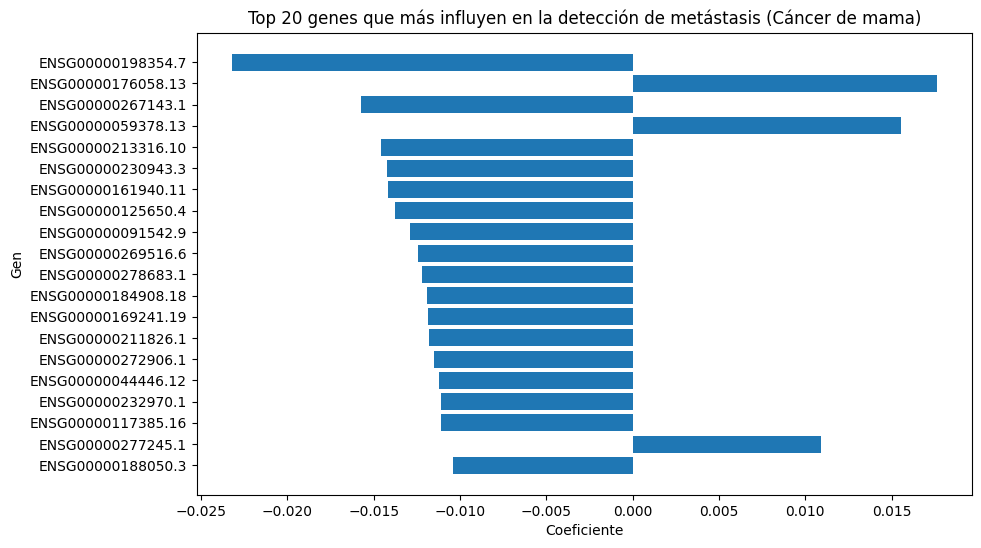

                     gene  coefficient  abs_coefficient
3911    ENSG00000198354.7    -0.023205         0.023205
1823   ENSG00000176058.13     0.017604         0.017604
16195   ENSG00000267143.1    -0.015746         0.015746
1688   ENSG00000059378.13     0.015559         0.015559
4060   ENSG00000213316.10    -0.014566         0.014566
11342   ENSG00000230943.3    -0.014251         0.014251
2091   ENSG00000161940.11    -0.014142         0.014142
24655   ENSG00000125650.4    -0.013768         0.013768
19986   ENSG00000091542.9    -0.012902         0.012902
26000   ENSG00000269516.6    -0.012454         0.012454
20316   ENSG00000278683.1    -0.012203         0.012203
20586  ENSG00000184908.18    -0.011905         0.011905
4187   ENSG00000169241.19    -0.011864         0.011864
25586   ENSG00000211826.1    -0.011780         0.011780
5831    ENSG00000272906.1    -0.011509         0.011509
17249  ENSG00000044446.12    -0.011225         0.011225
24468   ENSG00000232970.1    -0.011095         0

In [31]:
## BRCA
# Cargar el modelo y obtener los coeficientes
model_BRCA = joblib.load(brca_directory)
coefficients_BRCA = model_BRCA.coef_[0]
coef_df_BRCA = pd.DataFrame({
    'gene': data_BRCA.columns,
    'coefficient': coefficients_BRCA
})

# Ordenar por el valor absoluto
coef_df_BRCA['abs_coefficient'] = coef_df_BRCA['coefficient'].abs()
coef_df_BRCA = coef_df_BRCA.sort_values(by='abs_coefficient', ascending=False)

# Visualizar los 20 genes más importantes
top_genes_BRCA = coef_df_BRCA.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_genes_BRCA['gene'], top_genes_BRCA['coefficient'])
plt.xlabel('Coeficiente')
plt.ylabel('Gen')
plt.title('Top 20 genes que más influyen en la detección de metástasis (Cáncer de mama)')
plt.gca().invert_yaxis()
plt.show()
print(top_genes_BRCA)

In [34]:
# Obtener los top 1000 genes más importantes para PRAD
top_genes_PRAD = set(coef_df_PRAD.head(1000)['gene'])
# Obtener los top 1000 genes más importantes para BRCA
top_genes_BRCA = set(coef_df_BRCA.head(1000)['gene'])

# Encontrar los genes comunes
shared_genes = top_genes_PRAD.intersection(top_genes_BRCA)
print("Genes compartidos en el top 100 entre cáncer de próstata (PRAD) y cáncer de mama (BRCA):")
print(len(shared_genes))

Genes compartidos en el top 100 entre cáncer de próstata (PRAD) y cáncer de mama (BRCA):
32


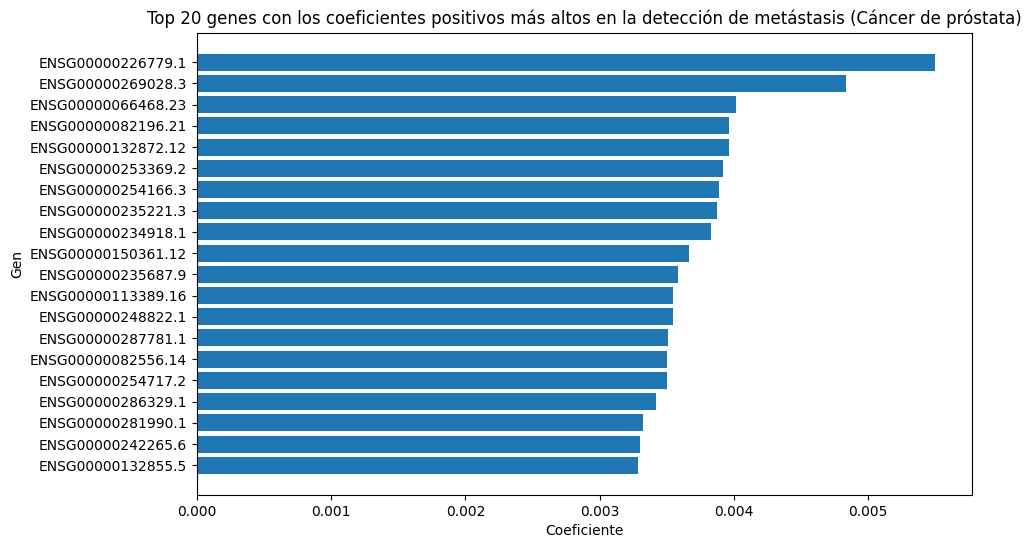

                     gene  coefficient  abs_coefficient
26249   ENSG00000226779.1     0.005496         0.005496
34827   ENSG00000269028.3     0.004833         0.004833
32466  ENSG00000066468.23     0.004013         0.004013
18888  ENSG00000082196.21     0.003962         0.003962
23938  ENSG00000132872.12     0.003960         0.003960
30297   ENSG00000253369.2     0.003919         0.003919
23006   ENSG00000254166.3     0.003886         0.003886
18065   ENSG00000235221.3     0.003871         0.003871
19024   ENSG00000234918.1     0.003829         0.003829
3906   ENSG00000150361.12     0.003664         0.003664
7109    ENSG00000235687.9     0.003583         0.003583
14014  ENSG00000113389.16     0.003548         0.003548
6469    ENSG00000248822.1     0.003547         0.003547
15499   ENSG00000287781.1     0.003509         0.003509
35714  ENSG00000082556.14     0.003499         0.003499
28650   ENSG00000254717.2     0.003498         0.003498
28178   ENSG00000286329.1     0.003417         0

In [35]:
## PRAD
# Filtrar los coeficientes positivos
positive_coef_df_PRAD = coef_df_PRAD[coef_df_PRAD['coefficient'] > 0]
positive_coef_df_PRAD = positive_coef_df_PRAD.sort_values(by='coefficient', ascending=False)

# Visualizar los primeros 20 genes
top_positive_genes_PRAD = positive_coef_df_PRAD.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_positive_genes_PRAD['gene'], top_positive_genes_PRAD['coefficient'])
plt.xlabel('Coeficiente')
plt.ylabel('Gen')
plt.title('Top 20 genes con los coeficientes positivos más altos en la detección de metástasis (Cáncer de próstata)')
plt.gca().invert_yaxis()
plt.show()
print(top_positive_genes_PRAD)

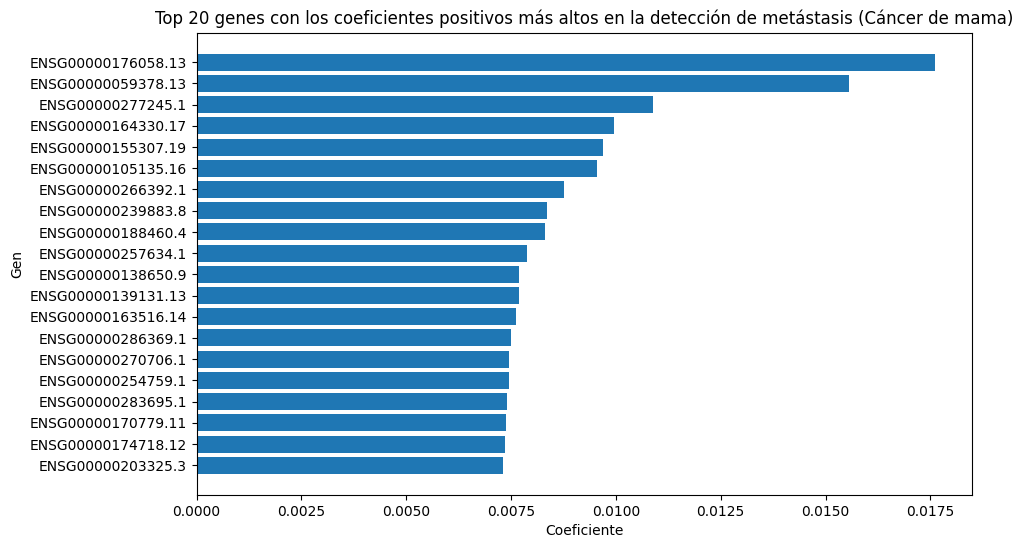

                     gene  coefficient  abs_coefficient
1823   ENSG00000176058.13     0.017604         0.017604
1688   ENSG00000059378.13     0.015559         0.015559
542     ENSG00000277245.1     0.010887         0.010887
21971  ENSG00000164330.17     0.009961         0.009961
1663   ENSG00000155307.19     0.009693         0.009693
23834  ENSG00000105135.16     0.009548         0.009548
14339   ENSG00000266392.1     0.008755         0.008755
10036   ENSG00000239883.8     0.008355         0.008355
23624   ENSG00000188460.4     0.008311         0.008311
20805   ENSG00000257634.1     0.007872         0.007872
11983   ENSG00000138650.9     0.007696         0.007696
5491   ENSG00000139131.13     0.007689         0.007689
3983   ENSG00000163516.14     0.007608         0.007608
16735   ENSG00000286369.1     0.007496         0.007496
27009   ENSG00000270706.1     0.007443         0.007443
14190   ENSG00000254759.1     0.007440         0.007440
19539   ENSG00000283695.1     0.007394         0

In [36]:
## BRCA
# Filtrar los coeficientes positivos
positive_coef_df_BRCA = coef_df_BRCA[coef_df_BRCA['coefficient'] > 0]
positive_coef_df_BRCA = positive_coef_df_BRCA.sort_values(by='coefficient', ascending=False)

# Visualizar los primeros 20 genes
top_positive_genes_BRCA = positive_coef_df_BRCA.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_positive_genes_BRCA['gene'], top_positive_genes_BRCA['coefficient'])
plt.xlabel('Coeficiente')
plt.ylabel('Gen')
plt.title('Top 20 genes con los coeficientes positivos más altos en la detección de metástasis (Cáncer de mama)')
plt.gca().invert_yaxis()
plt.show()
print(top_positive_genes_BRCA)